In [1]:
!pip install wordcloud

In [2]:
import pandas as pd 
import numpy as np 
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.metrics import accuracy_score
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re
import string
%matplotlib inline

In [3]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
print(stopwords.words("english"))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

#### READING THE DATASETS 

In [8]:
FakeNews = pd.read_csv("Fake.csv")
TrueNews = pd.read_csv("True.csv")

In [9]:
FakeNews.head(10)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017"
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017"
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017"
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017"
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017"


In [10]:
FakeNews["class"] = 0
TrueNews["class"] = 1

In [11]:
FakeNews= FakeNews.dropna(axis= 0)
TrueNews = TrueNews.dropna(axis= 0)

In [12]:
FakeNews.isnull().sum()

title      0
text       0
subject    0
date       0
class      0
dtype: int64

In [13]:
TrueNews.isnull().sum()

title      0
text       0
subject    0
date       0
class      0
dtype: int64

In [14]:
len(FakeNews)
FakeNews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23481 entries, 0 to 23480
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
 4   class    23481 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.1+ MB


In [15]:
len(TrueNews)
TrueNews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21417 entries, 0 to 21416
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
 4   class    21417 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1003.9+ KB


In [17]:
TrueNews.sample(10)

,title,text,subject,date,class
4766,Black lawmakers meet with Trump about infrastr...,WASHINGTON (Reuters) - Leaders of the Congress...,politicsNews,"March 22, 2017",1
15581,UK says Briton kidnapped in Nigeria last month...,LONDON (Reuters) - A Briton kidnapped in Niger...,worldnews,"November 6, 2017",1
6890,Ex-U.S. attorney from California top candidate...,WASHINGTON (Reuters) - Former U.S. Attorney De...,politicsNews,"December 6, 2016",1
4303,Maryland lawmakers approve bill to fight drug ...,WASHINGTON (Reuters) - Maryland lawmakers have...,politicsNews,"April 11, 2017",1
18073,Gunman attacks Saudi security forces at gate o...,RIYADH (Reuters) - Two Saudi guards were shot ...,worldnews,"October 7, 2017",1
14984,"Human rights, killings not addressed in Dutert...",MANILA (Reuters) - The issue of human rights a...,worldnews,"November 13, 2017",1
8453,Former Fox News chief Ailes is not advising Tr...,"WASHINGTON (Reuters) - Roger Ailes, the Fox Ne...",politicsNews,"August 16, 2016",1
672,"Vietnam, China avoid quarrel over South China ...",(Reuters) - China and Vietnam avoided conflict...,politicsNews,"November 12, 2017",1
14876,Russia says didn't promise withdrawal of pro-I...,MOSCOW (Reuters) - Russia has not promised to ...,worldnews,"November 14, 2017",1
4594,U.S. Commerce Secretary Ross to join economic ...,TOKYO (Reuters) - U.S. Commerce Secretary Wilb...,politicsNews,"March 30, 2017",1


#### VISIALIZATION OF EACH DATASET USING WORD CLOUD 

(-0.5, 799.5, 499.5, -0.5)

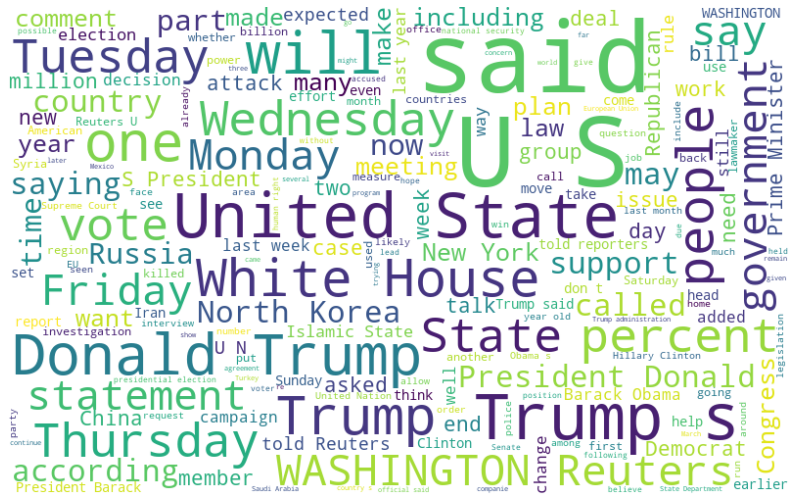

In [18]:
TrueNews = TrueNews[TrueNews["class"]== 1]
True_words = ''.join([words for words in TrueNews.text])

wordcloud = WordCloud(width=800, height=500,background_color='white', random_state=42, max_font_size= 100).generate(True_words)


plt.figure(figsize=(15,9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')


(-0.5, 799.5, 499.5, -0.5)

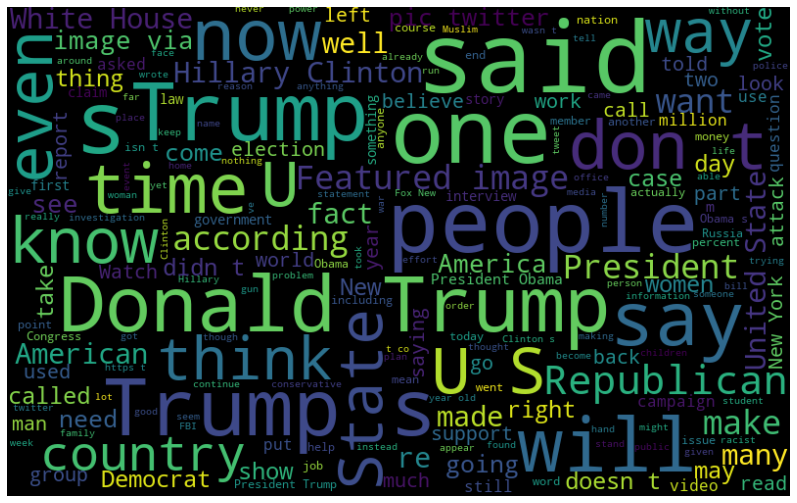

In [19]:
FakeNews = FakeNews[FakeNews["class"]== 0]
False_words = ''.join([words for words in FakeNews.text])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size= 100).generate(False_words)


plt.figure(figsize=(15,9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')


In [20]:
Whole_data = pd.concat([TrueNews,FakeNews]).reset_index(drop=True)

In [21]:
Whole_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   class    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB


In [22]:
from sklearn.utils import shuffle

Whole_data =shuffle(Whole_data)
Whole_data = Whole_data.reset_index(drop=True)
Whole_data.head()

,title,text,subject,date,class
0,Colorado Police Officer Convicted Of Murder I...,"On Thursday, June 23, 2016, a Colorado jury co...",News,"June 24, 2016",0
1,WHOA! CHRIS MATTHEWS DEFIES Liberal Media Scri...,LOL! Chris thrill up his leg Matthews does h...,politics,"Aug 4, 2016",0
2,Former ‘Apprentice’ Contestants Unite AGAINST...,When you want to learn more about what a perso...,News,"April 15, 2016",0
3,Cruz Campaign Donates Water To Flint–But Only...,Ted Cruz is fast approaching Donald Trump as t...,News,"January 22, 2016",0
4,WHY ARE GOOGLE AND FACEBOOK ATTENDING BILDERBE...,"Why are banking powerhouses, European Prime Mi...",Government News,"Jun 9, 2015",0


In [23]:
Whole_data.subject.value_counts()

politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64

<AxesSubplot:xlabel='subject', ylabel='count'>

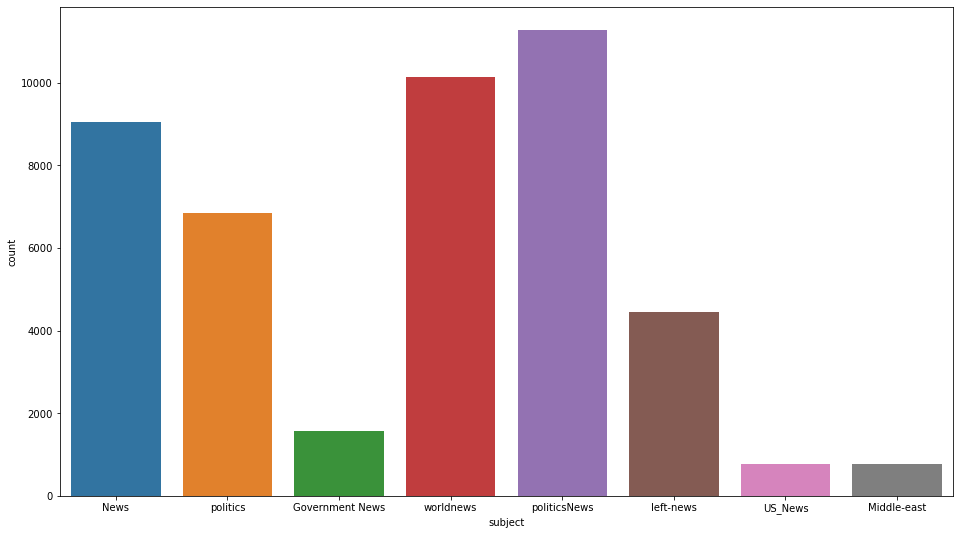

In [24]:
plt.figure(figsize=(16,9))
sns.countplot(x='subject', data=Whole_data)

In [25]:
Whole_data.drop(["title","date"],axis=1,inplace=True)
Whole_data.head()

,text,subject,class
0,"On Thursday, June 23, 2016, a Colorado jury co...",News,0
1,LOL! Chris thrill up his leg Matthews does h...,politics,0
2,When you want to learn more about what a perso...,News,0
3,Ted Cruz is fast approaching Donald Trump as t...,News,0
4,"Why are banking powerhouses, European Prime Mi...",Government News,0


In [26]:
import nltk
nltk.download('stopwords')
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [27]:
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()
for index,row in Whole_data.iterrows():
    filter_sentence = ''
    
    sentence = row['text']
    sentence= re.sub(r"(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", sentence)
    #sentence = re.sub(r'[^\w\s]','',sentence) #cleaning
    
    words = nltk.word_tokenize(sentence) #tokenization
    
    words = [w for w in words if not w in stop_words]  #stopwords removal
    
    for word in words:
        filter_sentence = filter_sentence + ' ' + str(lemmatizer.lemmatize(word)).lower()
        
    Whole_data.loc[index,'text'] = filter_sentence


In [28]:
Whole_data.head(5)

,text,subject,class
0,on thursday june 23 2016 colorado jury convic...,News,0
1,lol chris thrill leg matthews best convince s...,politics,0
2,when want learn person really like talk peopl...,News,0
3,ted cruz fast approaching donald trump hated ...,News,0
4,why banking powerhouse european prime ministe...,Government News,0


In [29]:
Whole_data = Whole_data[['text','class']]


In [30]:
Whole_data.sample(15)

,text,class
6949,somebody must put truth serum little donnie c...,0
20514,reuters special counsel robert mueller examin...,1
38808,donald trump literally old man yell televisio...,0
2111,president trump chief strategist steve bannon...,0
14300,republican presidential candidate ted cruz mu...,0
11118,sydney reuters australia discovered wreck fir...,1
6191,steve bannon called street fighter george clo...,0
27354,pathetic little basement dweller original occ...,0
33824,,0
41047,when crowd people listening kind idiotic dram...,0


In [31]:
X_train = Whole_data['text'].values
Y_train = Whole_data['class'].values

In [32]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

In [34]:
def vectorize_text(features, max_features):
    vectorizer = TfidfVectorizer( stop_words='english',
                            decode_error='strict',
                            analyzer='word',
                            ngram_range=(1, 2),
                            max_features=max_features
                            #max_df=0.5 # Verwendet im ML-Kurs unter Preprocessing                   
                            )
    feature_vec = vectorizer.fit_transform(features)
    return feature_vec.toarray()

In [35]:
print(X_train)

[' on thursday june 23 2016 colorado jury convicted former rocky ford police officer james ashby seconddegree murder ashby conviction stem 2014 killing 27yearold jack jacquezjacquez skateboarding near home rocky ford stopped ashby the onduty officer followed jacquez house he shot back mother opening doorwhile ashby claimed jacquez mouthed stop witness testimony contradicted version eventsas new york daily news reported february 2015the brother police officer ridealong ashby night kyle moore contradicted ashby account he said jacquez talk back ashby walked straight street side entrance house mother opened door himashby also claimed jacquez produced baseball bat house attempted swing the coroner report showed man could attack position ashby fired weaponashby first colorado police officer charged murder associated onduty incident 20 yearson day colorado jury convicted ashby two widely recognized case involving law enforcement officer also decided those case much different outcomeson thurs

In [36]:
count_vectorizer = CountVectorizer()
count_vectorizer.fit_transform(X_train)
freq_term_matrix = count_vectorizer.transform(X_train)
tfidf = TfidfTransformer(norm="l2")
tfidf.fit(freq_term_matrix)
tf_idf_matrix = tfidf.fit_transform(freq_term_matrix)

In [38]:
tf_idf_matrix

<44898x220668 sparse matrix of type '<class 'numpy.float64'>'
	with 7546628 stored elements in Compressed Sparse Row format>

In [39]:
test_counts = count_vectorizer.transform(Whole_data['text'].values)
test_tfidf = tfidf.transform(test_counts)

#split in samples
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tf_idf_matrix, Y_train, random_state=0, test_size = 0.40)

In [40]:
from sklearn.metrics import confusion_matrix
logreg = LogisticRegression(C=1e5)
logreg.fit(X_train, y_train)
pred = logreg.predict(X_test)
print('Accuracy of Lasso classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Lasso classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))
from sklearn.naive_bayes import MultinomialNB
# print(("Test accuracy: ", NN.score(X_test, y_test)))
# print(("Train accuracy: ",NN.score(X_train, y_train)))
cm = confusion_matrix(y_test, pred)
cm

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy of Lasso classifier on training set: 1.00
Accuracy of Lasso classifier on test set: 1.00


array([[9405,   56],
       [  30, 8469]], dtype=int64)

In [41]:
X_train = Whole_data['text']
Y_train = Whole_data['class']

In [42]:
from sklearn.pipeline import Pipeline
from sklearn import linear_model import joblib

In [43]:
pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer(norm='l2')),
    ('clf', linear_model.LogisticRegression(C=1e5)),
])

In [44]:
pipeline.fit(X_train, Y_train)

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(C=100000.0))])

In [46]:
pipeline.predict([" Pope Francis marks 10 years as head of the Roman Catholic Church on Monday celebrating Mass with cardinals in the chapel of the Vatican's Santa Marta hotel where he has lived since his election "])

array([1], dtype=int64)

In [48]:
filename = 'modeling.sav'
lb.dump(pipeline,filename)

['modeling.sav']